In [ ]:
#essential libraries
import pandas as pd                   #pandas does things with matrixes
import numpy as np                    #used for sorting a matrix
import matplotlib.pyplot as plt       #matplotlib is used for plotting data
import matplotlib.ticker as ticker    #used for changing tick spacing
import datetime as dt                 #used for dates
import matplotlib.dates as mdates     #used for dates, in a different way
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from plotly.offline import iplot
import plotly.graph_objects as go
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta
import plotly.graph_objects as go
from plotly.offline import iplot
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import datetime
from datetime import timedelta
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima 
from pmdarima.arima import ADFTest
from statsmodels.tsa.stattools  import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing, ExponentialSmoothing, HoltWintersResults
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
!pip install pmdarima

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
#importing dataset
df1 = pd.read_csv(r"all_stocks_5yr.csv")
df1.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df = df1[df1['Name'] == 'AAPL'] 
df.size

8813

In [ ]:
df.drop(columns=["open", "high", "low", "volume", "Name"], inplace=True)
df

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,close
1259,2013-02-08,67.8542
1260,2013-02-11,68.5614
1261,2013-02-12,66.8428
1262,2013-02-13,66.7156
1263,2013-02-14,66.6556
...,...,...
2513,2018-02-01,167.7800
2514,2018-02-02,160.5000
2515,2018-02-05,156.4900
2516,2018-02-06,163.0300


In [ ]:
df.set_index('date', inplace=True)
df

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556
...,...
2018-02-01,167.7800
2018-02-02,160.5000
2018-02-05,156.4900


In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df = df.resample('D').ffill()
df

,close
date,
2013-02-08,67.8542
2013-02-09,67.8542
2013-02-10,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
...,...
2018-02-03,160.5000
2018-02-04,160.5000
2018-02-05,156.4900


In [ ]:
df.index[0]

Timestamp('2013-02-08 00:00:00', freq='D')

## Understanding the Dataset

The first step towards data analysis is to understand the data in hand. Its columns, max, min, count, null values

In [ ]:
df.columns                    #prints just the columns of the matrix

Index(['close'], dtype='object')

In [ ]:
df.info()                            #get information of each column

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   1826 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


In [ ]:
df.describe()                        #describe the dataset

,close
count,1826.000000
mean,109.045796
std,30.577073
min,55.789900
25%,84.723125
50%,108.985000
75%,127.080000
max,179.260000


## Missing values

In this section we will handle all the missing data in the dataset

In [ ]:
total = df.isnull().sum().sort_values()                                              #counts all null cells in a row
percent = ((df.isnull().sum()/df.isnull().count()).sort_values()*100)                #sees what percent of the data is null
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent'])            #combines the two matrixies
missing_data  

,Total,Percent
close,0,0.0


We observe that the total number of column with missing values are 0 after we do a forward fill.

## Plotting the Data

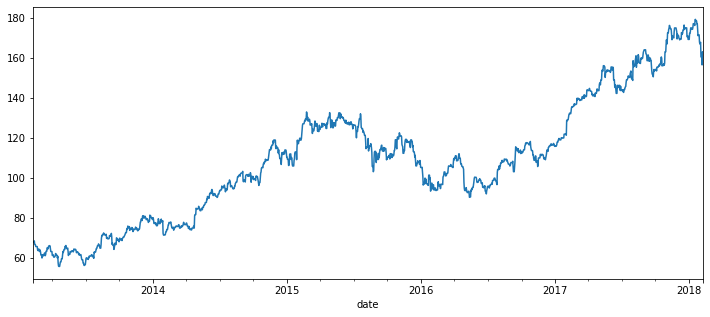

In [ ]:
df['close'].plot(figsize=(12,5))

## Seasonal Decomposition
Decomposing the time series model into their multiplicative and additive components

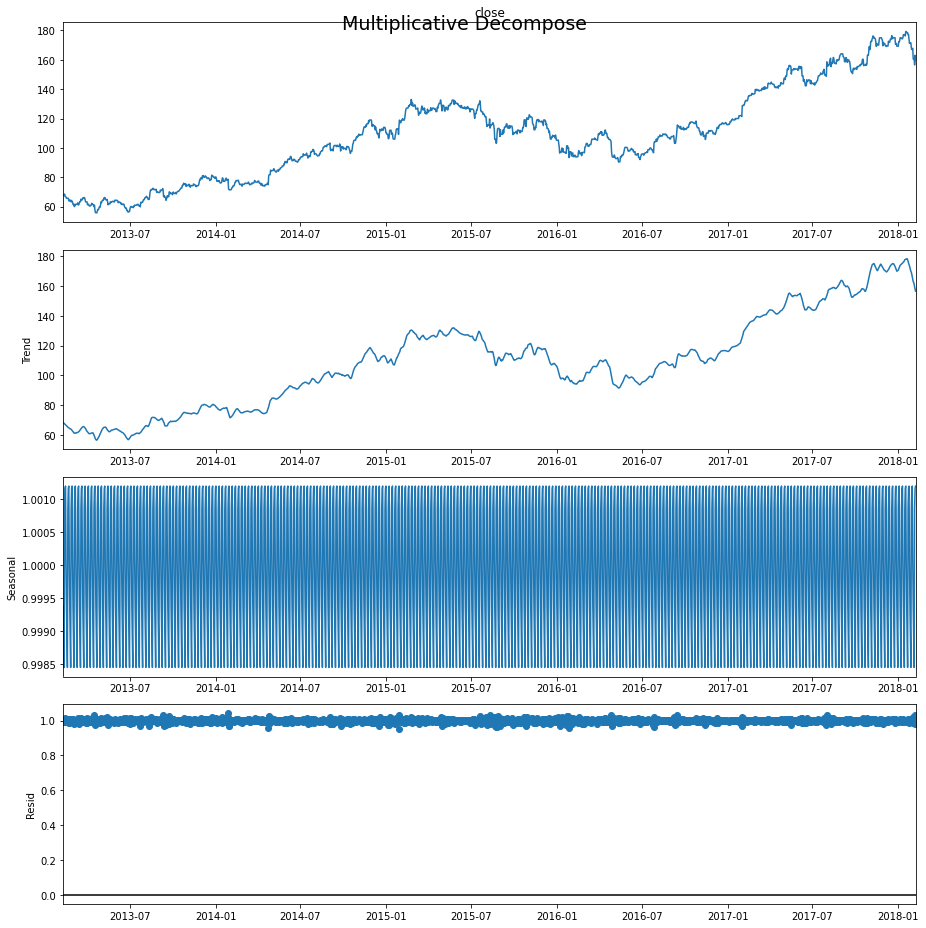

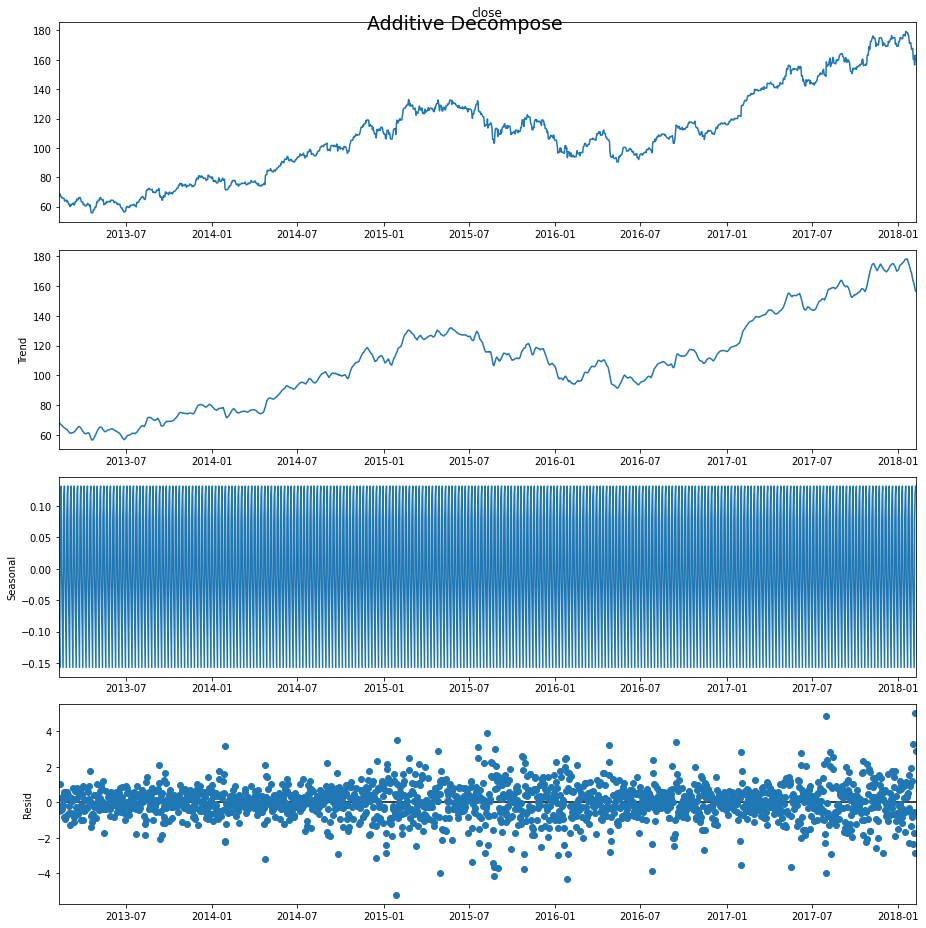

In [ ]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (13,13)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=19)
result_add.plot().suptitle('Additive Decompose', fontsize=19)
plt.show()

## Testing for stationarity


In [ ]:
X = df['close']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
 

ADF Statistic: -0.663878
p-value: 0.855885
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


The pvalues indicate that the time series is non stationary, time series is required to be made stationary

## ACF AND PACF Plots

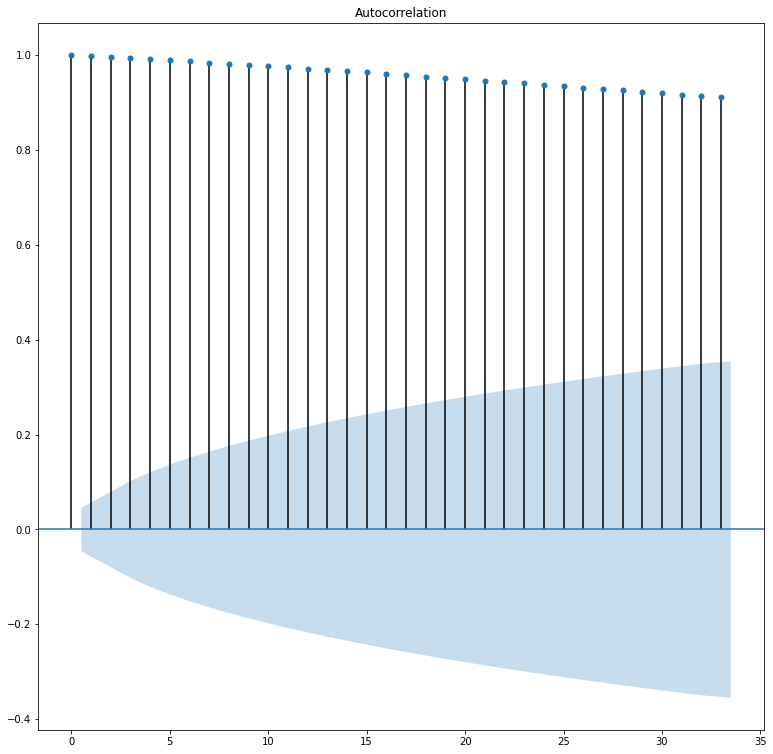

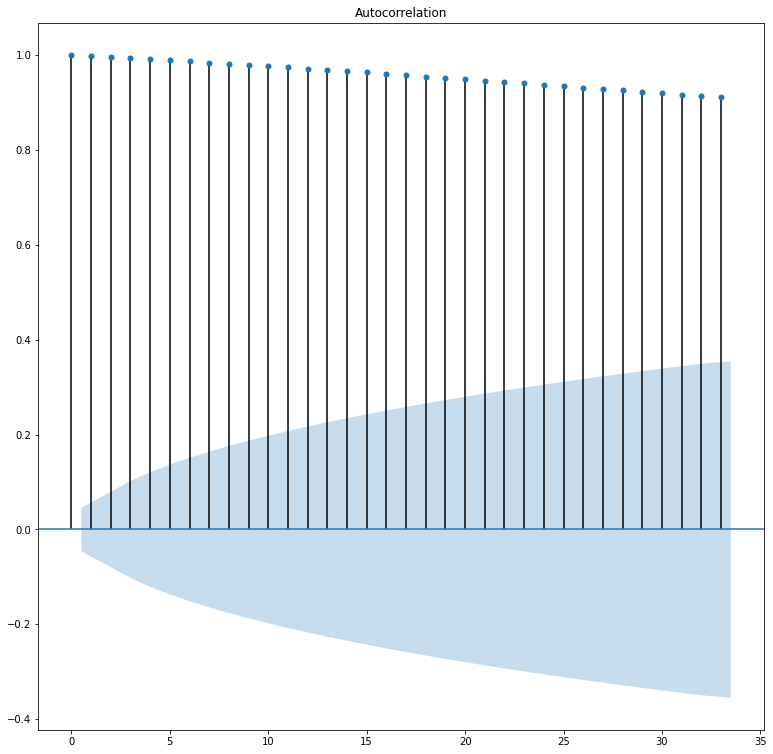

In [ ]:
plot_acf(df.close)

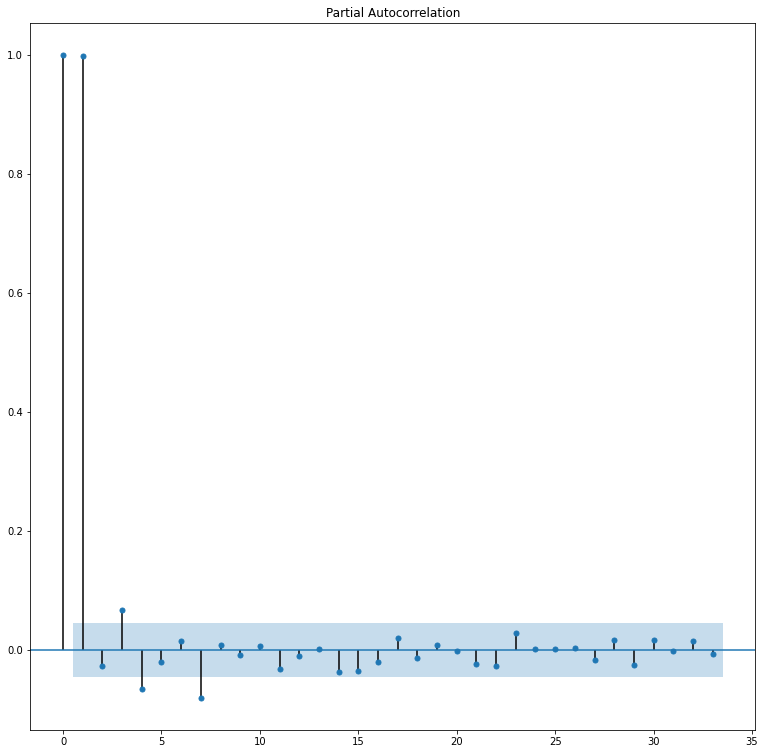

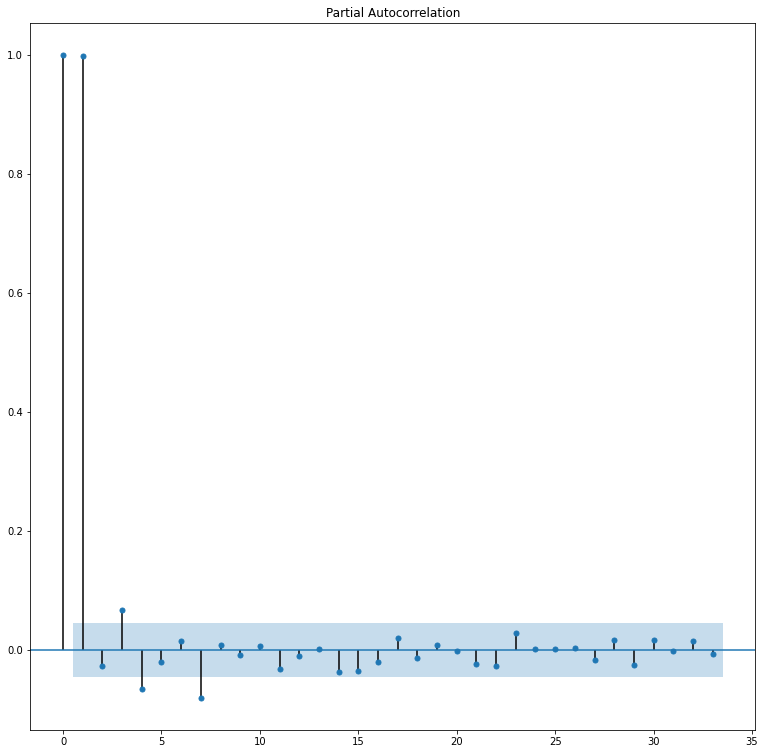

In [ ]:
plot_pacf(df.close)

In [ ]:
#!pip install pmdarima

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries,autolag='AIC')
    dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print('The test statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('%s: %.3f' % (key, value))

##### Figuring out Order for Arima model

In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(df['close'], trace=True,
# suppress_warnings=True)
# stepwise_fit.summary()

#### Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1826, 1)
(1796, 1) (30, 1)


#### Training the model

In [ ]:
size = int(len(df) * 0.75)
train, test = df[:size], df[size:]
arima_df = df.copy()
arima_df['ARIMA1'] = 0.0

In [ ]:
rmse = 0
history = train
predictions = pd.DataFrame(columns=['close'])
for i in range(0,len(test)):
    model = ARIMA(history, order=(5,1,0), enforce_invertibility=False, enforce_stationarity=False).fit()
    temp_df = pd.DataFrame({'close': model.forecast()}, index=model.forecast().index)
    predictions = predictions.append(temp_df)
    history = history.append(test[i: i + 1])
for i in range(0,size):
    arima_df['ARIMA1'][i] = model.fittedvalues[i]
for i in range(size, len(arima_df)):
    arima_df['ARIMA1'][i] = predictions['close'][i - size]
rmse = (np.sqrt(mean_squared_error(test, predictions)))
print(rmse)

1.4805847066874396


In [ ]:
arima_fig = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": df.index,
            "y": df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": arima_df.index[:size],
            "y": arima_df.ARIMA1[:size],
            "name": "(5,1,0) Train",
            "showlegend": True,
            "legendgroup": "AAPL - ARIMA(5,1,0)",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": arima_df.index[size:],
            "y": arima_df.ARIMA1[size:],
            "name": "(5,1,0) Test",
            "showlegend": True,
            "legendgroup": "AAPL - ARIMA(5,1,0)",
            "line": {
                "color": "Light Blue",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [arima_df.index[len(arima_df) - 261], arima_df.index[len(arima_df) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(arima_fig)

In [ ]:
rmse = []
arima_df_fitted = df.copy()
arima_df_fitted['ARIMA1'] = 0.0

lastdate = df.index[len(df) - 1]
index1 = []
for i in range(0, 10):
    lastdate = lastdate + timedelta(days=1)
    index1.append(lastdate)
arima_df_forecast = pd.DataFrame(columns=["ARIMA1"], index=index1)
arima_df_forecast['ARIMA1'] = 0.0


arima = ARIMA(df.close, order=(5,1,0), enforce_invertibility=False, enforce_stationarity=False).fit()

arima_df_fitted['ARIMA1'] = arima.fittedvalues
rmse = (np.sqrt(mean_squared_error(df.close, arima_df_fitted.ARIMA1)))
print(rmse)
arima_df_forecast['ARIMA1'] = arima.forecast(10)

2.0560926996982207


In [ ]:
arima_fig_forecast = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": df.index,
            "y": df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": arima_df_fitted.index,
            "y": arima_df_fitted.ARIMA1,
            "name": "(5,1,0) Trained",
            "showlegend": True,
            "legendgroup": "AAPL - ARIMA(5,1,0)",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": arima_df_forecast.index,
            "y": arima_df_forecast.ARIMA1,
            "name": "(5,1,0) Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - ARIMA(5,1,0)",
            "line": {
                "color": "Light Blue",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [arima_df_fitted.index[len(arima_df_fitted) - 261], arima_df_forecast.index[len(arima_df_forecast) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(arima_fig_forecast)

## Residual Error

In [ ]:
residual = df.copy()
residual["Residual"] = 0
for i in range(0, len(residual)):
    residual["Residual"][i] = df.close[i] - arima_df_fitted.ARIMA1[i]

arima_residual = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": residual.index,
            "y": residual.Residual,
            "name": "AAPL - Residual Error",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [arima_df_fitted.index[len(arima_df_fitted) - 261], arima_df_fitted.index[len(arima_df_fitted) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(arima_residual)

 This marks the end of the the ARIMA model                              

## Simple Exponential Smoothing

Creating the new dataframe to store the fitted and predicted values for the train dataset

In [ ]:
es_df = df.copy()
train_size = int(0.75*len(df))
train = es_df[:train_size]
test = es_df[train_size:]
es_df['ES1'] = 0.0
es_df['ES2'] = 0.0
es_df['ES3'] = 0.0

Training the model using the train data and comparing with the test data. rmse contains the RMSE values for all three sets of parameters

In [ ]:

es_smooth = [0.2, 0.6, 0.9]
rmse = []
for j in [1, 2, 3]:
    history = train
    predictions = pd.DataFrame(columns=['close'])
    for i in range(0,len(test)):
        model = SimpleExpSmoothing(history).fit(smoothing_level = es_smooth[j-1], optimized=False)
        temp_df = pd.DataFrame({'close': model.forecast()}, index=model.forecast().index)
        predictions = predictions.append(temp_df)
        history = history.append(test[i: i + 1])
    #     print('Predicted=%f, Expected=%f' % (df10.iloc[0,0], test.iloc[i:i+1,0]))
    for i in range(0,train_size):
        es_df['ES' + str(j)][i] = model.fittedvalues[i]
    for i in range(train_size, len(es_df)):
        es_df['ES' + str(j)][i] = predictions['close'][i - train_size]
    rmse.append(np.sqrt(mean_squared_error(test, predictions)))

print(rmse)

[2.493142167498496, 1.5733163604462166, 1.4785430512443944]


Plotting the train and test data along with the fitted and predicted models

In [ ]:
es_fig = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index,
            "y": es_df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[:train_size],
            "y": es_df.ES1[:train_size],
            "name": "0.2 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2 ES",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[train_size:],
            "y": es_df.ES1[train_size:],
            "name": "0.2 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2 ES",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[:train_size],
            "y": es_df.ES2[:train_size],
            "name": "0.6 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6 ES",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[train_size:],
            "y": es_df.ES2[train_size:],
            "name": "0.6 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6 ES",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[:train_size],
            "y": es_df.ES3[:train_size],
            "name": "0.9 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9 ES",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index[train_size:],
            "y": es_df.ES3[train_size:],
            "name": "0.9 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9 ES",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [es_df.index[len(es_df) - 261], es_df.index[len(es_df) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(es_fig)

Training the model with the entire dataset to get a future forecast

In [ ]:
es_smooth = [0.2, 0.6, 0.9]

es_df_fitted = df.copy()
es_df_fitted['ES1'] = 0.0
es_df_fitted['ES2'] = 0.0
es_df_fitted['ES3'] = 0.0

lastdate = es_df.index[len(es_df) - 1]
index1 = []
for i in range(0, 10):
    lastdate = lastdate + timedelta(days=1)
    index1.append(lastdate)
es_df_forecast = pd.DataFrame(columns=["ES1", "ES2", "ES3"], index=index1)
es_df_forecast["ES1"] = 0.0
es_df_forecast["ES2"] = 0.0
es_df_forecast["ES3"] = 0.0

for j in [1, 2, 3]:
    es = SimpleExpSmoothing(df).fit(smoothing_level=es_smooth[j-1], optimized=False)
    es_df_fitted['ES' + str(j)] = es.fittedvalues
    es_df_forecast['ES' + str(j)] = es.forecast(10)

Plotting the fitted values and the dataset along with the forecasting predictions for all three parameters

In [ ]:
es_fig_forecast = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df.index,
            "y": es_df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_fitted.index,
            "y": es_df_fitted.ES1,
            "name": "0.2 Trained",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2 ES",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_forecast.index,
            "y": es_df.ES1,
            "name": "0.2 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2 ES",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_fitted.index,
            "y": es_df_fitted.ES2,
            "name": "0.6 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6 ES",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_forecast.index,
            "y": es_df_forecast.ES2,
            "name": "0.6 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6 ES",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_fitted.index,
            "y": es_df_fitted.ES3,
            "name": "0.9 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9 ES",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": es_df_forecast.index,
            "y": es_df_forecast.ES3,
            "name": "0.9 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9 ES",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [es_df_fitted.index[len(es_df_fitted) - 261], es_df_forecast.index[len(es_df_forecast) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(es_fig_forecast)

## Holt's Method

Creating the new dataframe to store the fitted and predicted values for the train dataset using Holt's method

In [ ]:
holt_df = df.copy()
train_size = int(0.75*len(df))
train = df[:train_size]
test = df[train_size:]
holt_df['Holt1'] = 0.0
holt_df['Holt2'] = 0.0
holt_df['Holt3'] = 0.0

Training the model using the train data and comparing with the test data. rmse contains the RMSE values for all three sets of parameters

In [ ]:
holt_smooth = [0.2, 0.6, 0.9]
holt_trend = [0.4, 0.7, 0.5]
rmse = []
for j in [1, 2, 3]:
    history = train
    predictions = pd.DataFrame(columns=['close'])
    for i in range(0,len(test)):
        model = Holt(history).fit(smoothing_level=holt_smooth[j-1], smoothing_slope=holt_trend[j-1], optimized=False)
        temp_df = pd.DataFrame({'close': model.forecast()}, index=model.forecast().index)
        predictions = predictions.append(temp_df)
        history = history.append(test[i: i + 1])
    #     print('Predicted=%f, Expected=%f' % (df10.iloc[0,0], test.iloc[i:i+1,0]))
    for i in range(0,train_size):
        holt_df['Holt' + str(j)][i] = model.fittedvalues[i]
    for i in range(train_size, len(holt_df)):
        holt_df['Holt' + str(j)][i] = predictions['close'][i - train_size]
    rmse.append(np.sqrt(mean_squared_error(test, predictions)))

print(rmse)

[2.364623593579049, 1.6741287967750234, 1.67275002176825]


Plotting the train and test data along with the fitted and predicted models

In [ ]:
holt_fig = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index,
            "y": holt_df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[:train_size],
            "y": holt_df.Holt1[:train_size],
            "name": "0.2, 0.4 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4 Holt",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[train_size:],
            "y": holt_df.Holt1[train_size:],
            "name": "0.2, 0.4 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4 Holt",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[:train_size],
            "y": holt_df.Holt2[:train_size],
            "name": "0.6, 0.7 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7 Holt",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[train_size:],
            "y": holt_df.Holt2[train_size:],
            "name": "0.6, 0.7 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7 Holt",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[:train_size],
            "y": holt_df.Holt3[:train_size],
            "name": "0.9, 0.5 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5 Holt",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df.index[train_size:],
            "y": holt_df.Holt3[train_size:],
            "name": "0.9, 0.5 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5 Holt",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [holt_df.index[len(holt_df) - 261], holt_df.index[len(holt_df) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(holt_fig)

Training the model with the entire dataset to get a future forecast

In [ ]:
holt_smooth = [0.2, 0.6, 0.9]
holt_trend = [0.4, 0.7, 0.5]

holt_df_fitted = df.copy()
holt_df_fitted['Holt1'] = 0.0
holt_df_fitted['Holt2'] = 0.0
holt_df_fitted['Holt3'] = 0.0

lastdate = df.index[len(df) - 1]
index1 = []
for i in range(0, 10):
    lastdate = lastdate + timedelta(days=1)
    index1.append(lastdate)
holt_df_forecast = pd.DataFrame(columns=["Holt1", "Holt2", "Holt3"], index=index1)
holt_df_forecast["Holt1"] = 0.0
holt_df_forecast["Holt2"] = 0.0
holt_df_forecast["Holt3"] = 0.0

for j in [1, 2, 3]:
    holt = Holt(df).fit(smoothing_level=holt_smooth[j-1], smoothing_slope=holt_trend[j-1], optimized=False)
    holt_df_fitted['Holt' + str(j)] = holt.fittedvalues
    holt_df_forecast['Holt' + str(j)] = holt.forecast(10)

Plotting the fitted values and the dataset along with the forecasting predictions for all three parameters

In [ ]:
holt_fig_forecast = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": df.index,
            "y": df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_fitted.index,
            "y": holt_df_fitted.Holt1,
            "name": "0.2, 0.4 Trained",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4 Holt",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_forecast.index,
            "y": holt_df_forecast.Holt1,
            "name": "0.2, 0.4 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4 Holt",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_fitted.index,
            "y": holt_df_fitted.Holt2,
            "name": "0.6, 0.7 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7 Holt",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_forecast.index,
            "y": holt_df_forecast.Holt2,
            "name": "0.6, 0.7 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7 Holt",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_fitted.index,
            "y": holt_df_fitted.Holt3,
            "name": "0.9, 0.5 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5 Holt",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": holt_df_forecast.index,
            "y": holt_df_forecast.Holt3,
            "name": "0.9, 0.5 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5 Holt",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [es_df_fitted.index[len(es_df_fitted) - 261], es_df_forecast.index[len(es_df_forecast) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(holt_fig_forecast)

## Holt Winters Model

Creating the new dataframe to store the fitted and predicted values for the train dataset using Holt Winter's method

In [ ]:
winter_df = df.copy()
train_size = int(0.75*len(df))
train = df[:train_size]
test = df[train_size:]
winter_df['Winter1'] = 0.0
winter_df['Winter2'] = 0.0
winter_df['Winter3'] = 0.0

Training the model using the train data and comparing with the test data. rmse contains the RMSE values for all three sets of parameters

In [ ]:
winter_smooth = [0.2, 0.6, 0.9]
winter_trend = [0.4, 0.7, 0.5]
winter_season = [0.5, 0.7, 0.6]
rmse = []
for j in [1, 2, 3]:
    history = train
    predictions = pd.DataFrame(columns=['close'])
    for i in range(0,len(test)):
        model = ExponentialSmoothing(history, seasonal_periods=365, trend='add', seasonal='add').fit(smoothing_level=winter_smooth[j-1], smoothing_slope=winter_trend[j-1], smoothing_seasonal=winter_season[j-1], optimized=False)
        temp_df = pd.DataFrame({'close': model.forecast()}, index=model.forecast().index)
        predictions = predictions.append(temp_df)
        history = history.append(test[i: i + 1])
    #     print('Predicted=%f, Expected=%f' % (df10.iloc[0,0], test.iloc[i:i+1,0]))
    for i in range(0,train_size):
        winter_df['Winter' + str(j)][i] = model.fittedvalues[i]
    for i in range(train_size, len(holt_df)):
        winter_df['Winter' + str(j)][i] = predictions['close'][i - train_size]
    rmse.append(np.sqrt(mean_squared_error(test, predictions)))

print(rmse)

[4.54679332298562, 3.713417217616251, 3.048032945248377]


Plotting the train and test data along with the fitted and predicted models

In [ ]:
winter_fig = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index,
            "y": winter_df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[:train_size],
            "y": winter_df.Winter1[:train_size],
            "name": "0.2, 0.4, 0.5 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4, 0.5 Winter",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[train_size:],
            "y": winter_df.Winter1[train_size:],
            "name": "0.2, 0.4, 0.5 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4, 0.5 Winter",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[:train_size],
            "y": winter_df.Winter2[:train_size],
            "name": "0.6, 0.7, 0.7 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7, 0.7 Winter",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[train_size:],
            "y": winter_df.Winter2[train_size:],
            "name": "0.6, 0.7, 0.7 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7, 0.7 Winter",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[:train_size],
            "y": winter_df.Winter3[:train_size],
            "name": "0.9, 0.5, 0.6 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5, 0.6 Winter",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df.index[train_size:],
            "y": winter_df.Winter3[train_size:],
            "name": "0.9, 0.5, 0.6 Test",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5, 0.6 Winter",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [winter_df.index[len(winter_df) - 261], winter_df.index[len(winter_df) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(winter_fig)

Training the model with the entire dataset to get a future forecast

In [ ]:
winter_smooth = [0.2, 0.6, 0.9]
winter_trend = [0.4, 0.7, 0.5]
winter_season = [0.5, 0.7, 0.6]

winter_df_fitted = df.copy()
winter_df_fitted['Winter1'] = 0.0
winter_df_fitted['Winter2'] = 0.0
winter_df_fitted['Winter3'] = 0.0

lastdate = df.index[len(df) - 1]
index1 = []
for i in range(0, 10):
    lastdate = lastdate + timedelta(days=1)
    index1.append(lastdate)
winter_df_forecast = pd.DataFrame(columns=["Winter1", "Winter2", "Winter3"], index=index1)
winter_df_forecast["Winter1"] = 0.0
winter_df_forecast["Winter2"] = 0.0
winter_df_forecast["Winter3"] = 0.0

for j in [1, 2, 3]:
    winter = ExponentialSmoothing(history, seasonal_periods=365, trend='add', seasonal='add').fit(smoothing_level=winter_smooth[j-1], smoothing_slope=winter_trend[j-1], smoothing_seasonal=winter_season[j-1], optimized=False)
    winter_df_fitted['Winter' + str(j)] = winter.fittedvalues
    winter_df_forecast['Winter' + str(j)] = winter.forecast(10)

Plotting the fitted values and the dataset along with the forecasting predictions for all three parameters

In [ ]:
winter_fig_forecast = go.Figure(
    data=[
        {
            "type": "scatter",
            "mode": "lines",
            "x": df.index,
            "y": df.close,
            "name": "AAPL - Actual",
            "showlegend": True,
            "line": {
                "color": "Red",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_fitted.index,
            "y": winter_df_fitted.Winter1,
            "name": "0.2, 0.4, 0.5 Trained",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4, 0.5 Winter",
            "line": {
                "color": "Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_forecast.index,
            "y": winter_df_forecast.Winter1,
            "name": "0.2, 0.4, 0.5 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.2, 0.4, 0.5 Winter",
            "line": {
                "color": "Light Blue",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_fitted.index,
            "y": winter_df_fitted.Winter2,
            "name": "0.6, 0.7, 0.7 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7, 0.7 Winter",
            "line": {
                "color": "Black",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_forecast.index,
            "y": winter_df_forecast.Winter2,
            "name": "0.6, 0.7, 0.7 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.6, 0.7, 0.7 Winter",
            "line": {
                "color": "Grey",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_fitted.index,
            "y": winter_df_fitted.Winter3,
            "name": "0.9, 0.5, 0.6 Train",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5, 0.6 Winter",
            "line": {
                "color": "Green",
            },
        },
        {
            "type": "scatter",
            "mode": "lines",
            "x": winter_df_forecast.index,
            "y": winter_df_forecast.Winter3,
            "name": "0.9, 0.5, 0.6 Forecasted",
            "showlegend": True,
            "legendgroup": "AAPL - 0.9, 0.5, 0.6 Winter",
            "line": {
                "color": "Light Green",
            },
        },
    ],
    layout={
        "xaxis": {
            "spikemode": "toaxis+across",
            "spikethickness": 1,
            "spikedash": "solid",
            "range": [winter_df_fitted.index[len(winter_df_fitted) - 261], es_df_forecast.index[len(es_df_forecast) - 1]],
            "rangeslider": {
                "visible": True,
                "thickness": 0.075
            },
            "automargin": False,
        },
        "autosize": False,
        "width": 1000,
        "height": 600,
        "yaxis": {
            "title": "Close",
            "fixedrange": False,
            "spikethickness": 1,
            "spikemode": "toaxis+across",
            "spikedash": "solid",
            "showgrid": True,
        }
    }
)
iplot(winter_fig_forecast)

# Conclusion

The Holt Winter's model performs the best amongst all the Exponential Smoothing models as well as the ARIMA model and forecasts the trend with the highest accuracy as well.